In [7]:
INPUT_FOLDER = "../inputData/"
DATASET_FOLDER = "../datasets/"
video_dataset_folder = "/data/datasets/NTURGBD"
ACTION_LABEL_SET = ["A001","A002","A007","A008","A009","A031","A049","A023"]
# video_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb.avi" #Setup-Camera-Performer-Replication-Action

In [8]:
SEED = 1234
import os
import random
from os import listdir, scandir
from os.path import isfile, isdir, join, exists


setupFolders = [f for f in listdir(video_dataset_folder) if isdir(join(video_dataset_folder, f)) and f[:13]=="nturgbd_rgb_s"]
print(setupFolders)
fileNames = []
fileEntries = []
for folder in setupFolders:
    setupeEntryFiles = [f for f in scandir(join(video_dataset_folder,folder,"nturgb+d_rgb/")) 
                       if isfile(join(video_dataset_folder,folder,"nturgb+d_rgb/",f)) 
                       and any(label in f.name for label in ACTION_LABEL_SET)]
    fileEntries += setupeEntryFiles
    
#     fileNames.append([f for f in listdir(join(dataset_folder,folder,"nturgb+d_rgb/")) 
#                        if isfile(join(dataset_folder,folder,"nturgb+d_rgb/",f)) 
#                        and any(label in f for label in ACTION_LABEL_SET)])
                       
    fileNames.append([f.name for f in setupeEntryFiles])
        
fileNames = sum(fileNames, []) #making it in 1-row
print(len(fileNames)) 
random.seed(SEED)
random.shuffle(fileNames)

['nturgbd_rgb_s003', 'nturgbd_rgb_s008', 'nturgbd_rgb_s009', 'nturgbd_rgb_s005', 'nturgbd_rgb_s013', 'nturgbd_rgb_s001', 'nturgbd_rgb_s007', 'nturgbd_rgb_s015', 'nturgbd_rgb_s002', 'nturgbd_rgb_s004', 'nturgbd_rgb_s006', 'nturgbd_rgb_s010', 'nturgbd_rgb_s016', 'nturgbd_rgb_s017', 'nturgbd_rgb_s012', 'nturgbd_rgb_s011', 'nturgbd_rgb_s014']
7584


## Check that each file has been competely parsed

In [9]:
import os
from os import listdir, scandir
from os.path import isfile, isdir, join #, exists

foldersPerVideo = ["Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x","PoseNet-101","DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e"]
folder_names = [f[:-4] for f in fileNames]
analysedVideoFolders = [f.path for f in scandir(INPUT_FOLDER) if isdir(join(INPUT_FOLDER, f)) and f.name in folder_names]

analysedVideoFolders.sort(key=lambda x: os.path.getmtime(x)) #sort following the last modification time (useful for later as well)

print("Analyzing {} folders".format(len(analysedVideoFolders)))
missingVideoCounter = 0
for video_folder_name in analysedVideoFolders:
    modelFolderPaths = [f.path for f in scandir(video_folder_name) if isdir(f)]
    modelFolders = [f.split("/")[-1] for f in modelFolderPaths]
    if set(modelFolders) != set(foldersPerVideo):
#         print(video_folder_name, "doesn't contain", list(set(foldersPerVideo) - set(modelFolders)))
        missingVideoCounter += 1
    filesInFolder = len([f for f in listdir(modelFolderPaths[0])]) # take the number of files of the first model folder
    for model_folder_path in modelFolderPaths:
        if filesInFolder != len([f for f in listdir(model_folder_path)]): # each model folder must contain the same number of files
            print(model_folder_path, "not parsed correctly")
print("DONE!")

print("video done: {}\nMissing {} videos".format(len(analysedVideoFolders)-missingVideoCounter,missingVideoCounter))

Analyzing 7584 folders
../inputData/S016C001P007R002A031_rgb/PoseNet-101 not parsed correctly
../inputData/S016C001P007R002A031_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S002C001P013R002A031_rgb/PoseNet-101 not parsed correctly
../inputData/S002C001P013R002A031_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S011C001P028R001A031_rgb/PoseNet-101 not parsed correctly
../inputData/S011C001P028R001A031_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S008C001P030R002A002_rgb/PoseNet-101 not parsed correctly
../inputData/S008C001P030R002A002_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S008C001P034R001A031_rgb/PoseNet-101 not parsed correctly
../inputData/S008C001P034R001A031_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S003C001P019R002A031_rgb/PoseNet-101 not parsed correctly
../inputData/S003C001P019R002A031_rg

../inputData/S017C002P009R001A002_rgb/PoseNet-101 not parsed correctly
../inputData/S017C002P009R001A002_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S006C003P015R001A007_rgb/PoseNet-101 not parsed correctly
../inputData/S006C003P015R001A007_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S013C002P018R002A023_rgb/PoseNet-101 not parsed correctly
../inputData/S013C002P018R002A023_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S017C001P008R001A008_rgb/PoseNet-101 not parsed correctly
../inputData/S017C001P008R001A008_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S006C001P023R001A002_rgb/PoseNet-101 not parsed correctly
../inputData/S006C001P023R001A002_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x not parsed correctly
../inputData/S017C003P016R001A009_rgb/PoseNet-101 not parsed correctly
../inputData/S017C003P016R001A009_rgb/Detectron2-keypoint_r

In [15]:
set(modelFolders),set(foldersPerVideo)

({'DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e',
  'Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x',
  'PoseNet-101'},
 {'DensePoseKeyPointsMask_ResNet50_FPN_s1x',
  'Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x',
  'PoseNet-101'})

# Creation of Dataset

In [7]:
import pickle
import numpy as np
import parse

# A1. drink water.
# A2. eat meal/snack.
# A7. throw.
# A8. sitting down.
# A9. standing up (from sitting position).
# A23. hand waving.
# A31. pointing to something with finger.
# A38. salute.
# A49. use a fan (with hand or paper)/feeling warm.

video_folder_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb"
ACTION_LABEL_SET = [1,2,7,8,9,31,49,23]
# ["A001","A002","A007","A008","A009","A031","A049","A023"]


## PoseNet dataset

Posenet predicts: <br>
1 - nose <br>
2 - leftEye <br>
3 - rightEye <br>
4 - leftEar <br>
5 - rightEar <br>
6 - leftShoulder <br>
7 - rightShoulder <br>
8 - leftElbow <br>
9 - rightElbow <br>
10 - leftWrist <br>
11 - rightWrist <br>
12 - leftHip <br>
13 - rightHip <br>
14 - leftKnee <br>
15 - rightKnee <br>
16 - leftAnkle <br>
17 - rightAnkle

In [8]:
poseNetModelName = "PoseNet-101"
densePoseDatasetName = DATASET_FOLDER+poseNetModelName+"-dataset.pickle"
videoFeaturesList = []
videoLabelsList = []
videoSetupList = []
videoCameraList = []
videoPerformerList = []
videoReplicationList = []

for i,avf in enumerate(analysedVideoFolders):
    if i% 100 == 0:
        print("{}/{}".format(i, len(analysedVideoFolders)))
    
    # retrieve the target label from folder name
    setup, camera, performer, replication, target = parse.parse(video_folder_format,avf.split("/")[-1])
    
    if target not in ACTION_LABEL_SET:
        continue
    
    poseNet_folder = avf + "/"+ poseNetModelName
    pose_scores_video = []
#     keypoint_scores_video = [] # ignoring for now
    keypoint_coords_video = []
    framesInFolder = [f for f in listdir(poseNet_folder)]
    framesInFolder.sort() # must be sorted to have the frame in the correct order   
    for frame_file in framesInFolder:
        with open(poseNet_folder+"/"+frame_file,'rb') as file_in:
            pose_scores, keypoint_scores, keypoint_coords = pickle.load(file_in)
        pose_scores_video.append(pose_scores)
#         keypoint_scores_video.append(keypoint_scores) # for now ignoring the keypoints Scores
        keypoint_coords_video.append(keypoint_coords)
    
    # find the pose that along the whole video is the "surest"
    bestPoseIndex = np.argmax(np.mean(pose_scores_video, axis=0)) 
    
    # retrieving the keypoint coordinates for the best pose
    bestPoseKeypointCoords = [k[bestPoseIndex] for k in keypoint_coords_video] 
    
    
    videoFeaturesList.append(bestPoseKeypointCoords)
    videoLabelsList.append(target)
    videoSetupList.append(setup)
    videoCameraList.append(camera)
    videoPerformerList.append(performer)
    videoReplicationList.append(replication)

    
# saving dataset WITHOUT PADDING
videoFeatures = np.asarray(videoFeaturesList)
videoLabels = np.asarray(videoLabelsList)
videoSetups = np.asarray(videoSetupList)
videoCameras= np.asarray(videoCameraList)
videoPerformers = np.asarray(videoPerformerList)
videoReplications = np.asarray(videoReplicationList)

with open(densePoseDatasetName, 'wb') as handle:
    pickle.dump((videoFeatures, 
                 videoLabels,
                 videoSetups,
                 videoCameras,
                 videoPerformers,
                 videoReplications), handle, protocol=pickle.HIGHEST_PROTOCOL)
          
print("Done!")

0/8532
100/8532
200/8532
300/8532
400/8532
500/8532
600/8532
700/8532
800/8532
900/8532
1000/8532
1100/8532
1200/8532
1300/8532
1400/8532
1500/8532
1600/8532
1700/8532
1800/8532
1900/8532
2000/8532
2100/8532
2200/8532
2300/8532
2400/8532
2500/8532
2600/8532
2700/8532
2800/8532
2900/8532
3000/8532
3100/8532
3200/8532
3300/8532
3400/8532
3500/8532
3600/8532
3700/8532
3800/8532
3900/8532
4000/8532
4100/8532
4200/8532
4300/8532
4400/8532
4500/8532
4600/8532
4700/8532
4800/8532
4900/8532
5000/8532
5100/8532
5200/8532
5300/8532
5400/8532
5500/8532
5600/8532
5700/8532
5800/8532
5900/8532
6000/8532
6100/8532
6200/8532
6300/8532
6400/8532
6500/8532
6600/8532
6700/8532
6800/8532
6900/8532
7000/8532
7100/8532
7200/8532
7300/8532
7400/8532
7500/8532
7600/8532
7700/8532
7800/8532
7900/8532
8000/8532
8100/8532
8200/8532
8300/8532
8400/8532
8500/8532
Done!


In [9]:
poseNetModelName = "PoseNet-101"
densePoseDatasetName = DATASET_FOLDER+poseNetModelName+"-dataset.pickle"
with open(densePoseDatasetName,'rb') as file_in:
    readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

In [10]:
len(readLabels) 

7584

## Detectron2 dataset

Detectron2 predicts: <br>
1 - nose <br>
2 - left_eye <br>
3 - right_eye <br>
4 - left_ear <br>
5 - right_ear <br>
6 - left_shoulder <br>
7 - right_shoulder <br>
8 - left_elbow <br>
9 - right_elbow <br>
10 - left_wrist <br>
11 - right_wrist <br>
12 - left_hip <br>
13 - right_hip <br>
14 - left_knee <br>
15 - right_knee <br>
16 - left_ankle <br>
17 - right_ankle

In [11]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [12]:
import cv2
import parse
import pickle
import torch, torchvision
print(torch.__version__)
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

1.3.1


In [13]:
detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"
detectron2datasetName = DATASET_FOLDER+detectron2ModelName+"-dataset.pickle"
videoFeaturesList = []
videoLabelsList = []
videoSetupList = []
videoCameraList = []
videoPerformerList = []
videoReplicationList = []
for i, avf in enumerate(analysedVideoFolders):
    if i% 100 == 0:
        print("{}/{}".format(i, len(analysedVideoFolders)))
        
    # retrieve the target label from folder name
    setup, camera, performer, replication, target = parse.parse(video_folder_format,avf.split("/")[-1])
    
    if target not in ACTION_LABEL_SET:
        continue
        
    detectron2_folder = avf + "/Detectron2-"+ detectron2ModelName
    framesInFolder = [f for f in listdir(detectron2_folder)]
    framesInFolder.sort() # must be sorted to have the frame in the correct order   
    keypoints_video = []
    for frame_file in framesInFolder:
        with open(detectron2_folder+"/"+frame_file,'rb') as file_in:
            outputsRead = pickle.load(file_in)
#         if len(outputsRead['instances']) > 1:
#             print(detectron2_folder+"/"+frame_file, "has more than 1 pose")

        instancesFields = outputsRead['instances'].get_fields()

        # get only the most sure pose (Detectron sorts them for us)
        keypoints_frame = np.array(instancesFields['pred_keypoints'][0].cpu()) 
        keypoints_frame = [[k[0],k[1]] for k in keypoints_frame] #removing the third value (which I still didn't understand what it means)
        keypoints_video.append(keypoints_frame)

    videoFeaturesList.append(keypoints_video)
    videoLabelsList.append(target)
    videoSetupList.append(setup)
    videoCameraList.append(camera)
    videoPerformerList.append(performer)
    videoReplicationList.append(replication)

# saving dataset WITHOUT PADDING
videoFeatures = np.asarray(videoFeaturesList)
videoLabels = np.asarray(videoLabelsList)
videoSetups = np.asarray(videoSetupList)
videoCameras = np.asarray(videoCameraList)
videoPerformers = np.asarray(videoPerformerList)
videoReplications = np.asarray(videoReplicationList)

with open(detectron2datasetName, 'wb') as handle:
    pickle.dump((videoFeatures, 
                 videoLabels,
                 videoSetups,
                 videoCameras,
                 videoPerformers,
                 videoReplications), handle, protocol=pickle.HIGHEST_PROTOCOL)
         
print("Done!")

0/8532
100/8532
200/8532
300/8532
400/8532
500/8532
600/8532
700/8532
800/8532
900/8532
1000/8532
1100/8532
1200/8532
1300/8532
1400/8532
1500/8532
1600/8532
1700/8532
1800/8532
1900/8532
2000/8532
2100/8532
2200/8532
2300/8532
2400/8532
2500/8532
2600/8532
2700/8532
2800/8532
2900/8532
3000/8532
3100/8532
3200/8532
3300/8532
3400/8532
3500/8532
3600/8532
3700/8532
3800/8532
3900/8532
4000/8532
4100/8532
4200/8532
4300/8532
4400/8532
4500/8532
4600/8532
4700/8532
4800/8532
4900/8532
5000/8532
5100/8532
5200/8532
5300/8532
5400/8532
5500/8532
5600/8532
5700/8532
5800/8532
5900/8532
6000/8532
6100/8532
6200/8532
6300/8532
6400/8532
6500/8532
6600/8532
6700/8532
6800/8532
6900/8532
7000/8532
7100/8532
7200/8532
7300/8532
7400/8532
7500/8532
7600/8532
7700/8532
7800/8532
7900/8532
8000/8532
8100/8532
8200/8532
8300/8532
8400/8532
8500/8532
Done!


In [82]:
# videoFeatures.shape
# keypoints_frame_new = [[k[0],k[1]] for k in keypoints_frame]
# keypoints_frame_new
# keypoints_frame
# videoSetups,videoCameras,videoPerformers,videoReplications

(array([10]), array([3]), array([17]), array([1]))

In [14]:
detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"
detectron2datasetName = DATASET_FOLDER+detectron2ModelName+"-dataset.pickle"
with open(detectron2datasetName,'rb') as file_in:
    readFeaturesD2, readLabelsD2, readSetupsD2, readCamerasD2, readPerformersD2, readReplicationsD2 = pickle.load(file_in)
len(readLabelsD2)

7584

# splitting dataset in train-val-test

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

TEST_SIZE = 0.1
VAL_SIZE = 0.2
modelNames = ["PoseNet-101","keypoint_rcnn_X_101_32x8d_FPN_3x"]
for modelName in modelNames:
    datasetName = DATASET_FOLDER+modelName+"-dataset.pickle"
    with open(datasetName,'rb') as file_in:
        readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

    readOnes = [readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications]
    # TRAIN-TEST splitting
    sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE)
    for train_idx, test_idx in sss.split(readFeatures, readLabels):
        trainValSet = [el[train_idx] for el in readOnes]
        testSet = [el[test_idx] for el in readOnes]
    # TRAIN-VAL splitting
    sss = StratifiedShuffleSplit(n_splits=1, test_size=VAL_SIZE)
    for train_idx, val_idx in sss.split(trainValSet[0], trainValSet[1]):
        trainSet = [el[train_idx] for el in trainValSet]
        valSet = [el[val_idx] for el in trainValSet]
        
    with open(DATASET_FOLDER+modelName+"-SPLIT-dataset.pickle", 'wb') as handle:
        pickle.dump((trainSet, valSet, testSet), handle, protocol=pickle.HIGHEST_PROTOCOL)



In [40]:
with open(DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle",'rb') as file_in:
    read_train_set, read_val_set, read_test_set = pickle.load(file_in)


In [41]:
len(read_train_set[0])+len(read_val_set[0])+len(read_test_set[0])

7584

In [42]:
len(read_train_set[0]), len(read_val_set[0]), len(read_test_set[0])

(5460, 1365, 759)

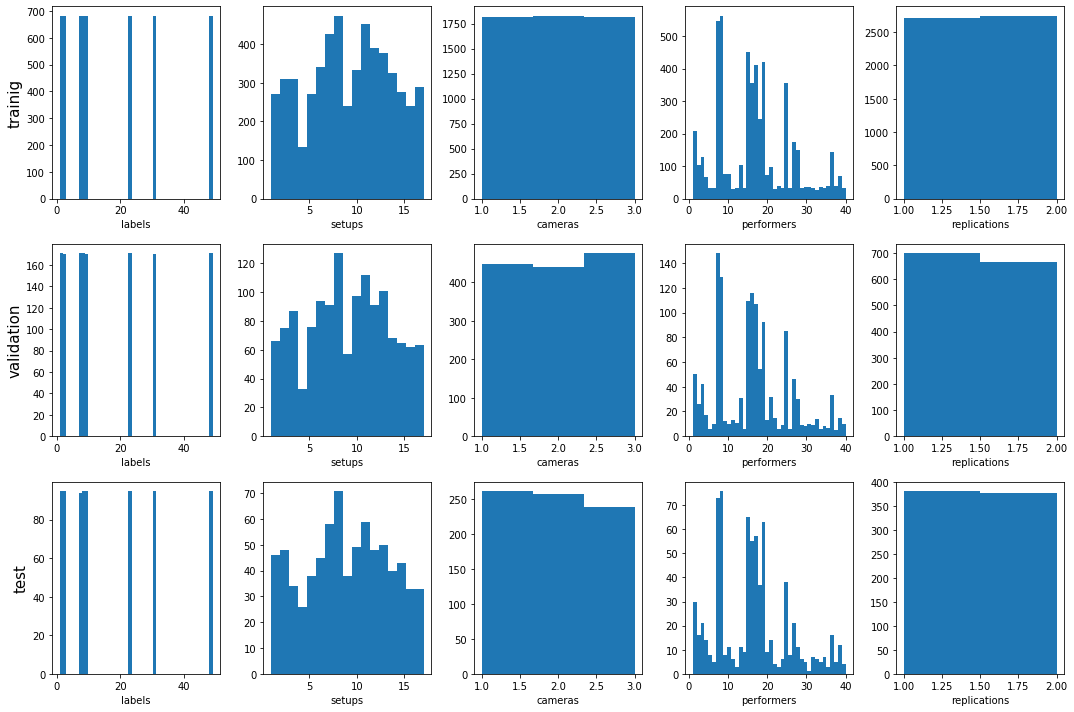

In [90]:
import matplotlib.pyplot as plt

xLabels = ["labels", "setups", "cameras", "performers", "replications"]
yLabels = ["trainig", "validation", "test"]
fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
for ids, dataSet in enumerate([read_train_set, read_val_set, read_test_set]):
    axes[ids][0].set_ylabel(yLabels[ids],fontsize = 15)
    for iid, data in enumerate(dataSet[1:]):
        axes[ids][iid].set_xlabel(xLabels[iid],fontsize = 10)
        axes[ids][iid].hist(data, bins = max(data))
fig.tight_layout()
plt.show()
        